In [1]:
import numpy  as np
import matplotlib.pyplot as plt

In [10]:
# data_cm = np.load('../data/qm9_labels_cm_lda.npz')
# data_bob = np.load('results/qm9/qm9_lda_bob.npz')
data_slatm = np.load('../data/qm9_lda_slatm.npz')

In [25]:
 #X_cm_trans = data_cm['X_trans']
# X_bob_trans = data_bob['X_trans']
X_slatm_trans = data_slatm['X_trans']
# labels = data_cm['labels']
labels = data_slatm['labels']

In [26]:
data_slatm.files

['X_trans', 'labels', 'G', 'H', 'L', 'U', 'C', 'M', 'E']

In [27]:
G = data_slatm['G']

In [28]:
def_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

colors = []
for l in labels:
    if l == 0:
        colors.append(def_colors[l + 1])
    elif l == 1:
        colors.append(def_colors[l + 1])
    elif l == 2:
        colors.append(def_colors[l + 1])

In [29]:
import sys

In [30]:
sys.path.insert(1, '../main/')

In [31]:
from KDEpy import FFTKDE
from qml_classes_qm7b_cv import group_by_label

In [32]:
# X_cm_trans_subsets, ul = group_by_label(X_cm_trans, labels)
# X_bob_trans_subsets, ul = group_by_label(X_bob_trans, labels)
X_slatm_trans_subsets, ul = group_by_label(X_slatm_trans, labels)
G_subsets, ul = group_by_label(G, labels)
colors_subsets, ul = group_by_label(colors, labels)

In [33]:
def reorder_classes(X_subsets, G_subsets):
    means = np.asarray([G_sub.mean() for G_sub in G_subsets])
    ordering = np.argsort(means)
    new_X_subsets = [X_subsets[i]  for i in ordering]
    return new_X_subsets

In [34]:
X_slatm_trans_subsets = reorder_classes(X_slatm_trans_subsets, G_subsets)

In [35]:
FFTKDE._bw_methods.keys()

dict_keys(['silverman', 'scott', 'ISJ'])

In [36]:
def get_2dkde(X, n_grid):
    kde = FFTKDE(kernel='gaussian')
    grid, points = kde.fit(data=X).evaluate(n_grid)

    x, y = np.unique(grid[:, 0]), np.unique(grid[:, 1])
    z = points.reshape(n_grid, n_grid).T
    return (x, y, z)

In [37]:
seed = 42

In [38]:
def plot_lda_scatter(scatter_subsets, x_subsets, y_subsets, z_subsets, n_contours, 
                     labels, loc, xticks, yticks, xlim, ylim, 
                     save=False, filename='figures/tmp/filename.png'):
    
    fs = 16
    
    markers = ['o', 's', '^']
    scolors = ['orange', 'forestgreen', 'firebrick']
    ccolors = ['darkorange', 'darkgreen', 'darkred']
    
    fig = plt.figure(figsize=(7.2, 7.2), dpi=200, tight_layout=True)
    ax = plt.subplot(111)

    for i, (scatter, x, y, z) in enumerate(zip(scatter_subsets, x_subsets, y_subsets, z_subsets)):
        
        ax.scatter(scatter[:, 0], scatter[:, 1], label=labels[i], color=scolors[i], alpha=.5, marker=markers[i], 
                   s=50., edgecolors='none')
        ax.contour(x, y, z, n_contours, colors=ccolors[i], lw=2.)
        
    ax.legend(fontsize=fs, loc=loc, frameon=False)
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        
    ax.tick_params(axis='both', labelsize=fs, direction='in', length=5., width=2.)
    
    ax.set_xlabel(r'$1^{\mathrm{st}}$ dimension', fontsize=fs)
    ax.set_ylabel(r'$2^{\mathrm{nd}}$ dimension', fontsize=fs)
    
    for side, sp in ax.spines.items():
        sp.set_linewidth(2.)
    
    if save:
        plt.savefig(filename)
    
    return

In [39]:
def reduce_X(X, N, seed):
    
    indices = np.arange(X.shape[0])
    np.random.seed(seed)
    np.random.shuffle(indices)
    rand_ind = indices[:N]
    
    return X[rand_ind]

In [40]:
N = 1000
seed = 42

In [41]:
# X_cm_red_subsets = [reduce_X(X_sub, N, seed) for X_sub in X_cm_trans_subsets]
# X_bob_red_subsets = [reduce_X(X_sub, N, seed) for X_sub in X_bob_trans_subsets]
X_slatm_red_subsets = [reduce_X(X_sub, N, seed) for X_sub in X_slatm_trans_subsets]

In [42]:
n_grid = 1000

In [43]:
# x_cm_subsets, y_cm_subsets, z_cm_subsets = [], [], []
# for X_sub in X_cm_trans_subsets:
#     x_tmp, y_tmp, z_tmp = get_2dkde(X_sub, n_grid)
#     x_cm_subsets.append(x_tmp)
#     y_cm_subsets.append(y_tmp)
#     z_cm_subsets.append(z_tmp)

In [44]:
# x_bob_subsets, y_bob_subsets, z_bob_subsets = [], [], []
# for X_sub in X_bob_trans_subsets:
#     x_tmp, y_tmp, z_tmp = get_2dkde(X_sub, n_grid)
#     x_bob_subsets.append(x_tmp)
#     y_bob_subsets.append(y_tmp)
#     z_bob_subsets.append(z_tmp)

In [45]:
x_slatm_subsets, y_slatm_subsets, z_slatm_subsets = [], [], []
for X_sub in X_slatm_trans_subsets:
    x_tmp, y_tmp, z_tmp = get_2dkde(X_sub, n_grid)
    x_slatm_subsets.append(x_tmp)
    y_slatm_subsets.append(y_tmp)
    z_slatm_subsets.append(z_tmp)

In [46]:
n_contours = 1

In [47]:
xticks = [-6, -4, -2, 0, 2, 4, 6]
yticks = [-6, -4, -2, 0, 2, 4, 6]
xlim = (-5, 5)
ylim = (-5, 7)

In [48]:
# plot_lda_scatter(X_cm_red_subsets, x_cm_subsets, y_cm_subsets, z_cm_subsets, n_contours, 
#                  xticks, yticks, xlim, ylim, 
#                  save=True, filename='figures/tmp/qm9_lda_cm.svg')

In [49]:
# for X_sub in X_bob_red_subsets:
#     print(np.amin(X_sub[:, 0]), np.amin(X_sub[:, 1]))

In [50]:
# for X_sub in X_bob_red_subsets:
#     print(np.amax(X_sub[:, 0]), np.amax(X_sub[:, 1]))

In [51]:
# plot_lda_scatter(X_bob_red_subsets, x_bob_subsets, y_bob_subsets, z_bob_subsets, n_contours, 
#                  xticks, yticks, xlim, ylim, 
#                  save=True, filename='figures/tmp/qm9_lda_bob.svg')

In [52]:
for X_sub in X_slatm_red_subsets:
    print(np.amin(X_sub[:, 0]), np.amin(X_sub[:, 1]))

0.45009404594669034 -4.252640925092751
-3.4615425793976304 -1.3460620763210582
-6.388812695436802 -4.823880786809929


In [53]:
for X_sub in X_slatm_red_subsets:
    print(np.amax(X_sub[:, 0]), np.amax(X_sub[:, 1]))

8.650592543218295 3.869111233942442
5.525936601784397 7.5066697001263405
0.6584149056016757 3.405660790711272


In [54]:
xlim = (-7, 9)
xticks = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
ylim = (-5, 8)
yticks  =[-8, -6, -4, -2, 0, 2, 4, 6, 8]

In [55]:
labels = ['Class I', 'Class II', 'Class III']

<ipython-input-38-59737d35e35a>:18: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(x, y, z, n_contours, colors=ccolors[i], lw=2.)


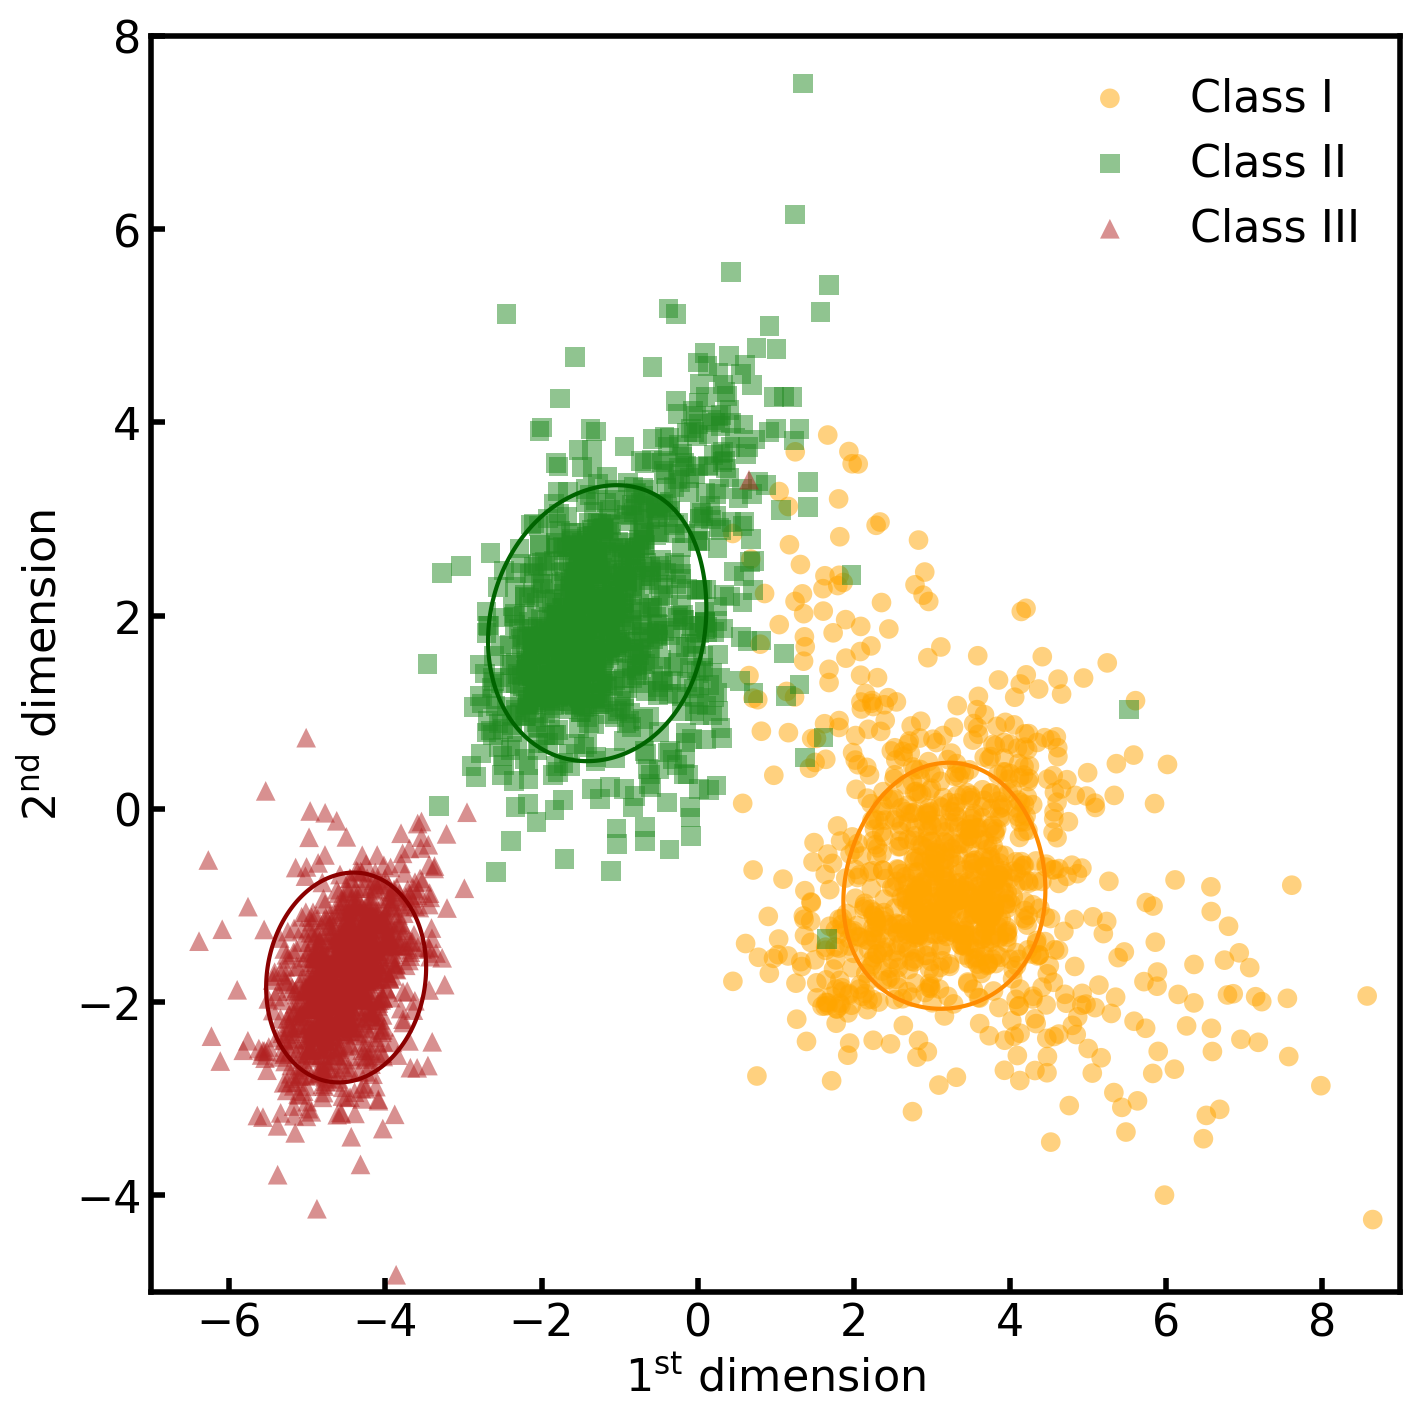

In [57]:
loc = 1
plot_lda_scatter(X_slatm_red_subsets, x_slatm_subsets, y_slatm_subsets, z_slatm_subsets, n_contours, labels, loc,
                 xticks, yticks, xlim, ylim, 
                 save=False, filename='figures/tmp/qm9_lda_slatm.svg')

In [58]:
from sklearn.mixture import GaussianMixture

In [59]:
gm = GaussianMixture(n_components=3)
gm.fit(G[:, np.newaxis])
labels_gm = gm.predict(G[:, np.newaxis])

In [62]:
data_x_qm9 = np.load('../data/qm9_labels_slatm.npz')
X_slatm = data_x_qm9['X']

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [65]:
lda_qm9 = LDA(n_components=2)
X_slatm_trans_gm = lda_qm9.fit_transform(X_slatm, labels_gm)

In [66]:
G_subsets_gm, ul = group_by_label(G, labels_gm)
X_subsets_gm, ul = group_by_label(X_slatm_trans_gm, labels_gm)

X_subsets_gm = reorder_classes(X_subsets_gm, G_subsets_gm)

In [67]:
X_subsets_gm_red = [reduce_X(X_sub, N, seed) for X_sub in X_subsets_gm]

In [68]:
x_slatm_subsets_gm, y_slatm_subsets_gm, z_slatm_subsets_gm = [], [], []
for X_sub in X_subsets_gm:
    x_tmp, y_tmp, z_tmp = get_2dkde(X_sub, n_grid)
    x_slatm_subsets_gm.append(x_tmp)
    y_slatm_subsets_gm.append(y_tmp)
    z_slatm_subsets_gm.append(z_tmp)

In [69]:
xlim = (-7, 9)
xticks = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
ylim = (-6, 4)
yticks  =[-8, -6, -4, -2, 0, 2, 4, 6, 8]

<ipython-input-38-59737d35e35a>:18: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(x, y, z, n_contours, colors=ccolors[i], lw=2.)


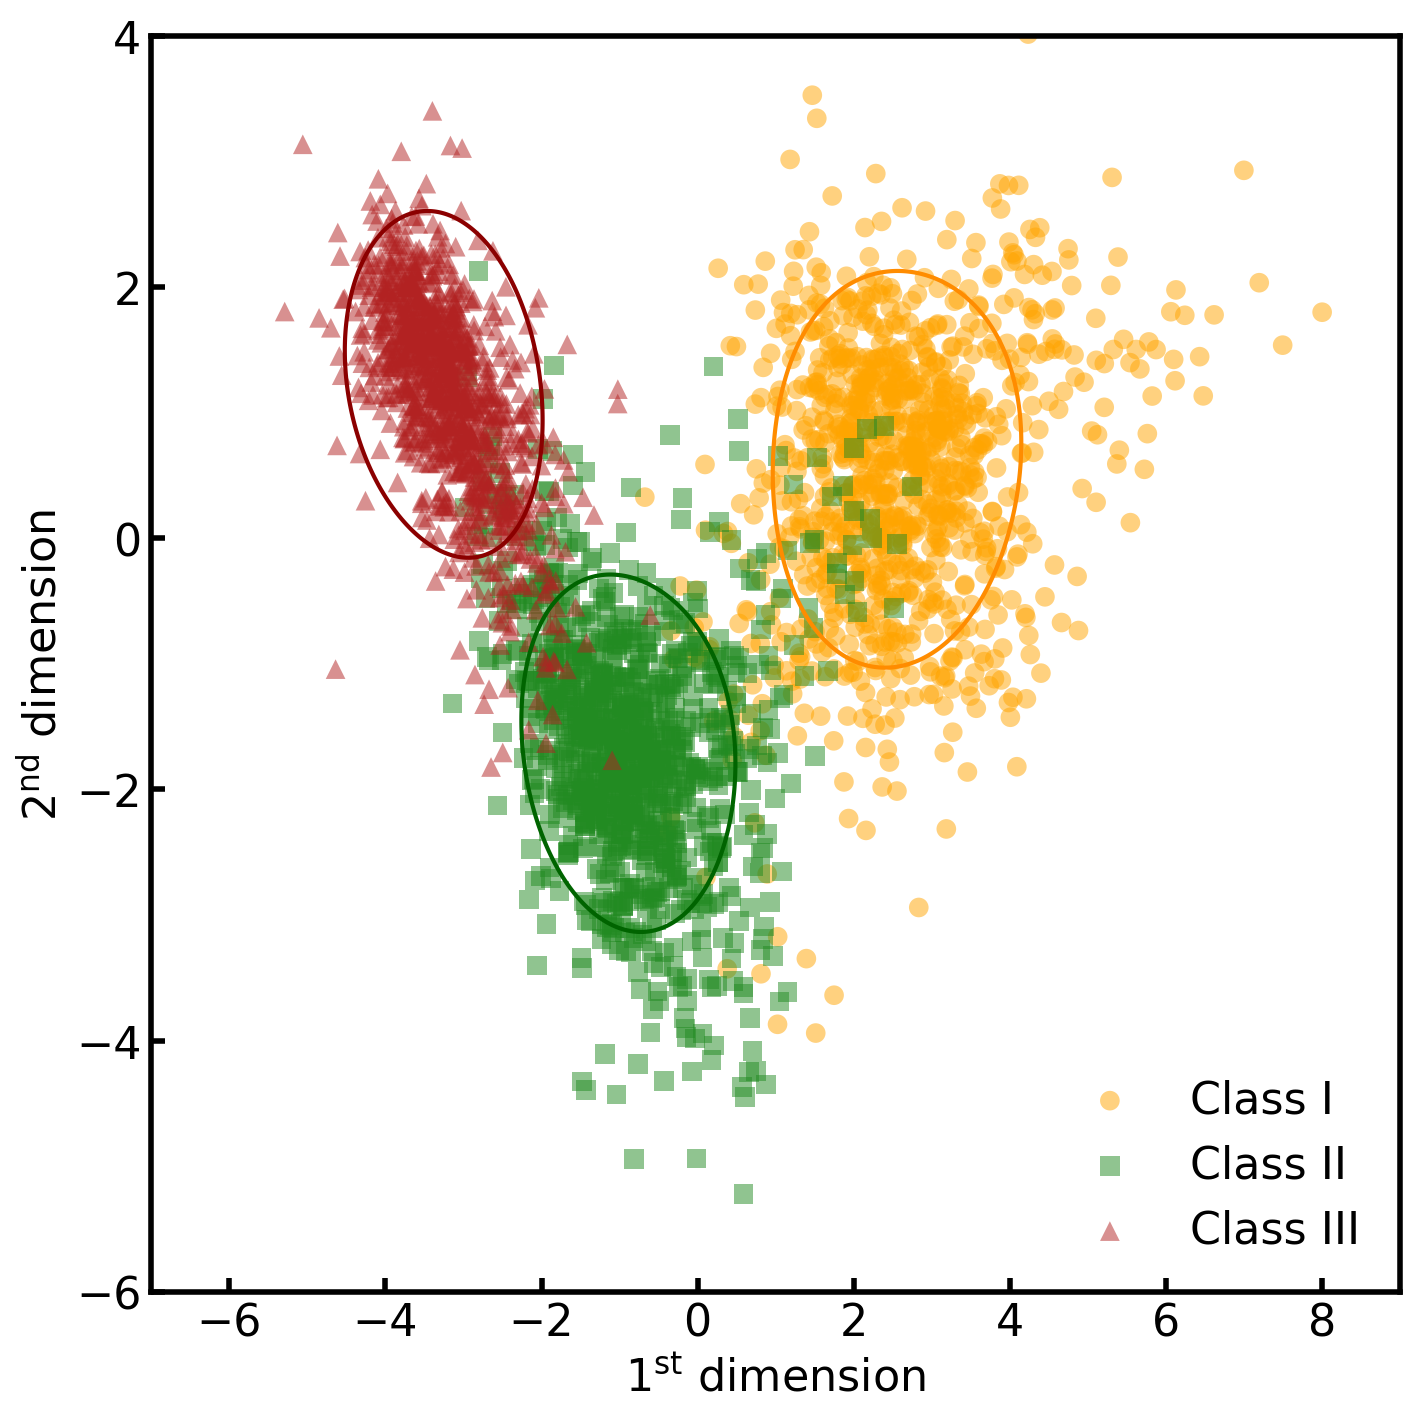

In [71]:
loc = 4
plot_lda_scatter(X_subsets_gm_red, x_slatm_subsets_gm, y_slatm_subsets_gm, z_slatm_subsets_gm, n_contours, labels, loc,
                 xticks, yticks, xlim, ylim, 
                 save=False, filename='figures/tmp/qm9_lda_slatm_gm.svg')

In [72]:
# data_cm_qm7b = np.load('results/qm7b/qm7b_lda_cm.npz')
# data_bob_qm7b = np.load('results/qm7b/qm7b_lda_bob.npz')
data_slatm_qm7b = np.load('../data/qm7b_lda_slatm.npz')

In [73]:
# X_cm_trans = data_cm_qm7b['X_trans']
# X_bob_trans = data_bob_qm7b['X_trans']
X_qm7b_trans = data_slatm_qm7b['X_trans']
labels_qm7b = data_slatm_qm7b['labels']

In [74]:
# X_cm_trans_subsets, ul = group_by_label(X_cm_trans, labels)
# X_bob_trans_subsets, ul = group_by_label(X_bob_trans, labels)
X_qm7b_trans_subsets, ul = group_by_label(X_qm7b_trans, labels_qm7b)

In [75]:
G_ZINDO = data_slatm_qm7b['G_ZINDO']
G_ZINDO_subsets, ul = group_by_label(G_ZINDO, labels_qm7b)
X_qm7b_trans_subsets = reorder_classes(X_qm7b_trans_subsets, G_ZINDO_subsets)

In [76]:
# X_cm_red_subsets = [reduce_X(X_sub, N, seed) for X_sub in X_cm_trans_subsets]
# X_bob_red_subsets = [reduce_X(X_sub, N, seed) for X_sub in X_bob_trans_subsets]
X_qm7b_red_subsets = [reduce_X(X_sub, N, seed) for X_sub in X_qm7b_trans_subsets]

In [77]:
# x_cm_subsets, y_cm_subsets, z_cm_subsets = [], [], []
# for X_sub in X_cm_trans_subsets:
#     x_tmp, y_tmp, z_tmp = get_2dkde(X_sub, n_grid)
#     x_cm_subsets.append(x_tmp)
#     y_cm_subsets.append(y_tmp)
#     z_cm_subsets.append(z_tmp)
    
# x_bob_subsets, y_bob_subsets, z_bob_subsets = [], [], []
# for X_sub in X_bob_trans_subsets:
#     x_tmp, y_tmp, z_tmp = get_2dkde(X_sub, n_grid)
#     x_bob_subsets.append(x_tmp)
#     y_bob_subsets.append(y_tmp)
#     z_bob_subsets.append(z_tmp)
    
x_qm7b_subsets, y_qm7b_subsets, z_qm7b_subsets = [], [], []
for X_sub in X_qm7b_trans_subsets:
    x_tmp, y_tmp, z_tmp = get_2dkde(X_sub, n_grid)
    x_qm7b_subsets.append(x_tmp)
    y_qm7b_subsets.append(y_tmp)
    z_qm7b_subsets.append(z_tmp)

In [78]:
xticks = [-16, -12, -8, -4,  0, 4, 8, 12]
yticks = [-6, -4, -2, 0, 2, 4, 6]
xlim = (-16, 12)
ylim = (-8, 5)

<ipython-input-38-59737d35e35a>:18: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(x, y, z, n_contours, colors=ccolors[i], lw=2.)


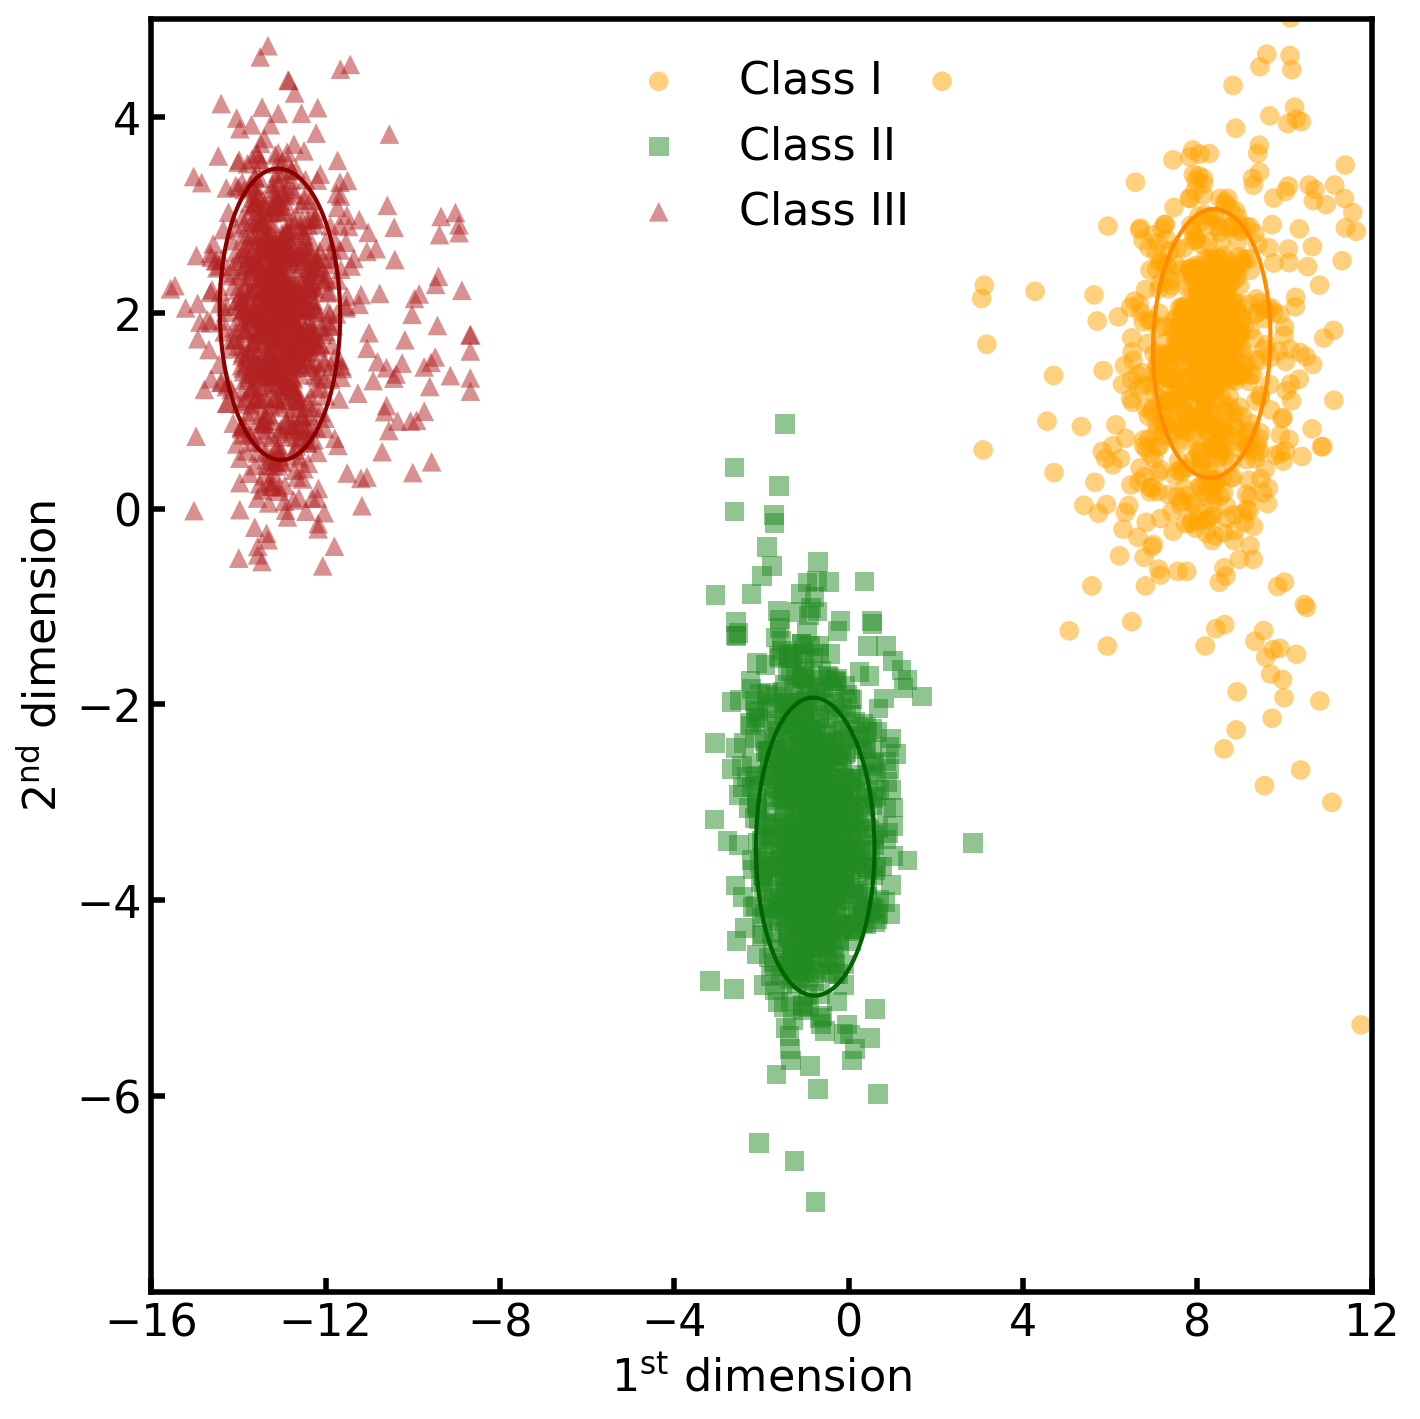

In [79]:
labels = ['Class I', 'Class II', 'Class III']
plot_lda_scatter(X_qm7b_red_subsets, x_qm7b_subsets, y_qm7b_subsets, z_qm7b_subsets, n_contours, labels, 9,
                 xticks, yticks, xlim, ylim, 
                 save=False, filename='figures/tmp/qm7b_lda_slatm.svg')

In [80]:
gm_qm7b = GaussianMixture(n_components=3)
gm_qm7b.fit(G_ZINDO[:, np.newaxis])
labels_gm_qm7b = gm_qm7b.predict(G_ZINDO[:, np.newaxis])

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [83]:
data_x_qm7b = np.load('../data/qm7b_labels_slatm.npz')
X_qm7b = data_x_qm7b['X']

FileNotFoundError: [Errno 2] No such file or directory: '../data/qm7b_labels_slatm.npz'

In [58]:
lda = LDA(n_components=2)
X_qm7b_trans_gm = lda.fit_transform(X_qm7b, labels_gm_qm7b)

In [59]:
G_ZINDO_subsets_gm, ul = group_by_label(G_ZINDO, labels_gm_qm7b)
X_qm7b_subsets_gm, ul = group_by_label(X_qm7b_trans_gm, labels_gm_qm7b)

X_qm7b_subsets_gm = reorder_classes(X_qm7b_subsets_gm, G_ZINDO_subsets_gm)

In [60]:
X_qm7b_subsets_gm_red = [reduce_X(X_sub, N, seed) for X_sub in X_qm7b_subsets_gm]

In [62]:
x_qm7b_subsets_gm, y_qm7b_subsets_gm, z_qm7b_subsets_gm = [], [], []
for X_sub in X_qm7b_subsets_gm:
    x_tmp, y_tmp, z_tmp = get_2dkde(X_sub, n_grid)
    x_qm7b_subsets_gm.append(x_tmp)
    y_qm7b_subsets_gm.append(y_tmp)
    z_qm7b_subsets_gm.append(z_tmp)

In [87]:
xticks = [-12, -8, -4, 0, 4, 8, 12]
yticks = [-6, -4, -2, 0, 2, 4, 6]
xlim = (-12, 12)
ylim = (-7, 7)

<ipython-input-81-59737d35e35a>:18: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(x, y, z, n_contours, colors=ccolors[i], lw=2.)


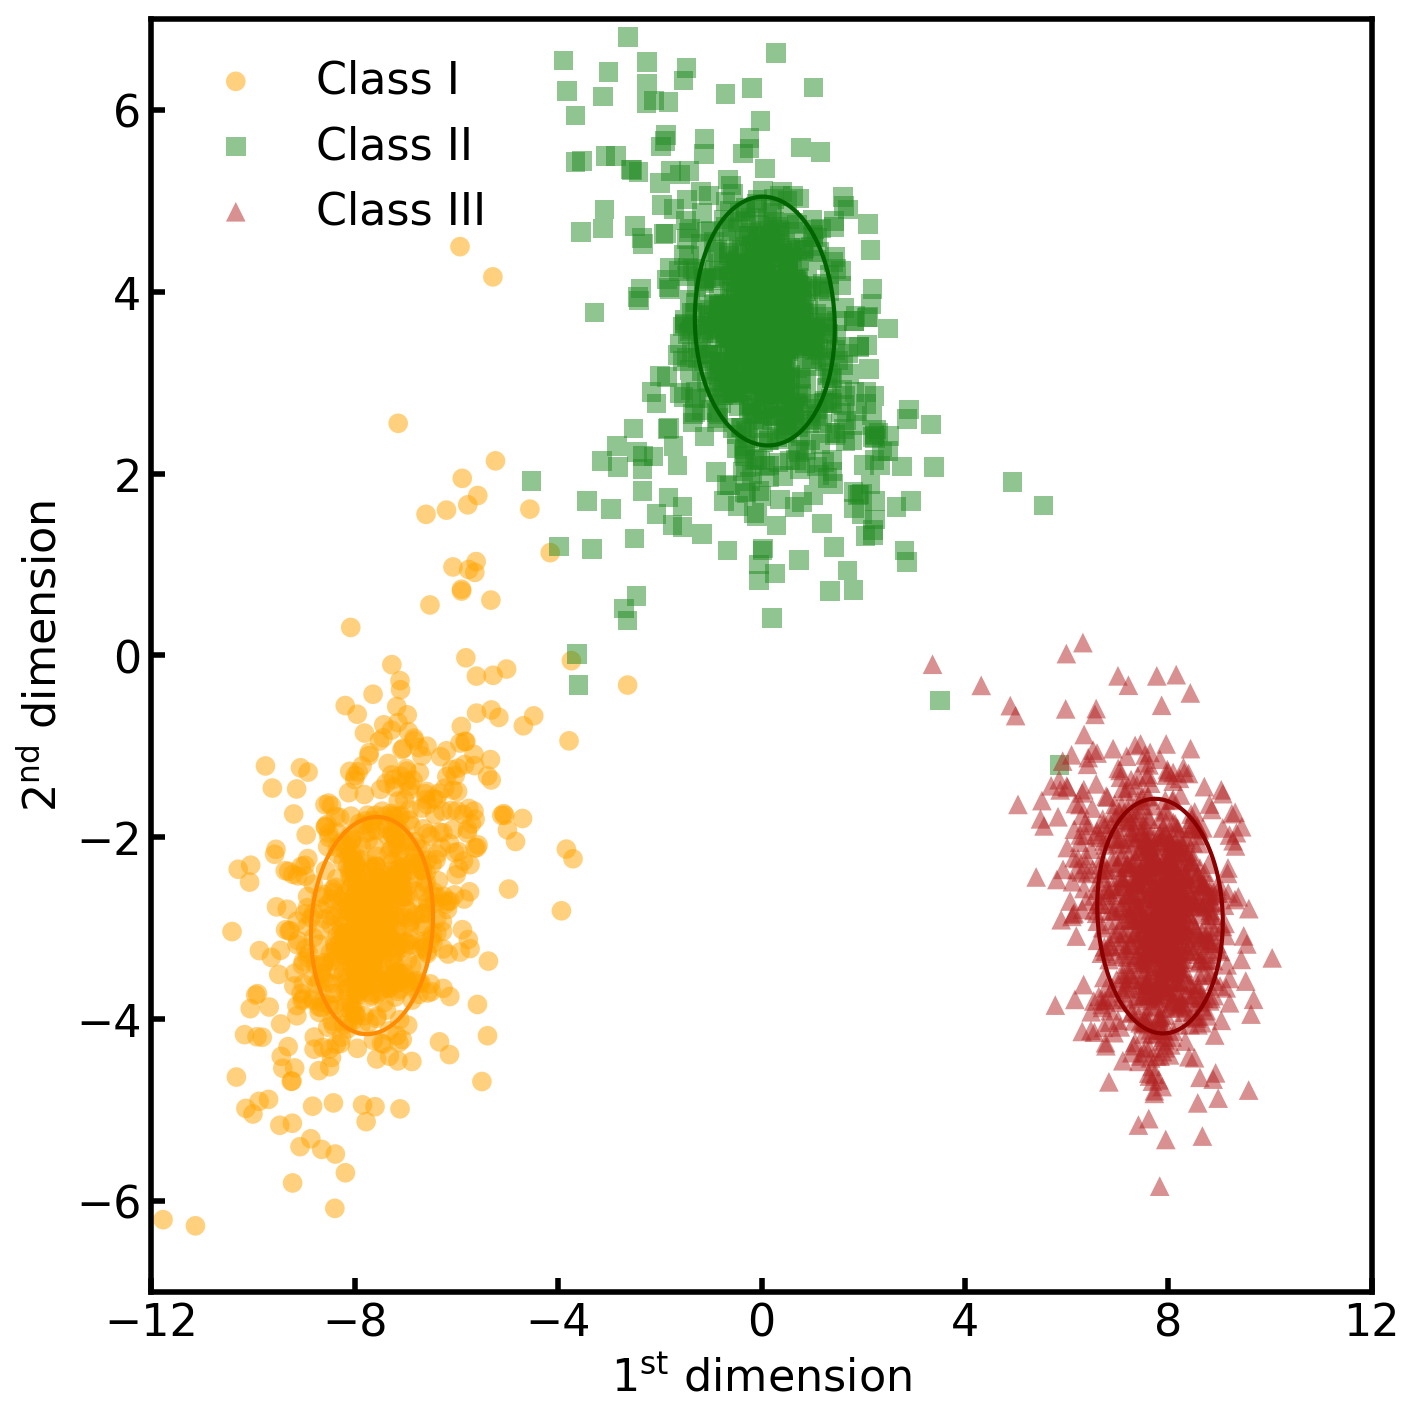

In [88]:
loc = 2
plot_lda_scatter(X_qm7b_subsets_gm_red, x_qm7b_subsets_gm, y_qm7b_subsets_gm, z_qm7b_subsets_gm, n_contours, labels, loc,
                 xticks, yticks, xlim, ylim, 
                 save=True, filename='figures/tmp/qm7b_lda_slatm_gm.svg')